In [ ]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization
import matplotlib.pyplot as plt

from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive, output
from PIL import Image


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
train_dir="Original Images/Original Images/"
generator = ImageDataGenerator()
train_ds = generator.flow_from_directory(train_dir,target_size=(224, 224),batch_size=32)
classes = list(train_ds.class_indices.keys())

Found 2561 images belonging to 31 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(classes),activation='softmax'))

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 111, 111, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                        

In [ ]:
history = model.fit(train_ds,epochs= 31, batch_size=32)

Epoch 1/31
81/81 [==============================] - 1191s 14s/step - loss: 3.4932 - accuracy: 0.0820
Epoch 2/31
81/81 [==============================] - 78s 970ms/step - loss: 2.8146 - accuracy: 0.2003
Epoch 3/31
81/81 [==============================] - 77s 954ms/step - loss: 2.3881 - accuracy: 0.2921
Epoch 4/31
81/81 [==============================] - 77s 957ms/step - loss: 1.9768 - accuracy: 0.4065
Epoch 5/31
81/81 [==============================] - 79s 965ms/step - loss: 1.7745 - accuracy: 0.4654
Epoch 6/31
81/81 [==============================] - 79s 965ms/step - loss: 1.4063 - accuracy: 0.5763
Epoch 7/31
81/81 [==============================] - 78s 953ms/step - loss: 1.1713 - accuracy: 0.6466
Epoch 8/31
81/81 [==============================] - 77s 948ms/step - loss: 0.9845 - accuracy: 0.7005
Epoch 9/31
81/81 [==============================] - 76s 946ms/step - loss: 1.2883 - accuracy: 0.5912
Epoch 10/31
81/81 [==============================] - 77s 947ms/step - loss: 0.6764 - accura

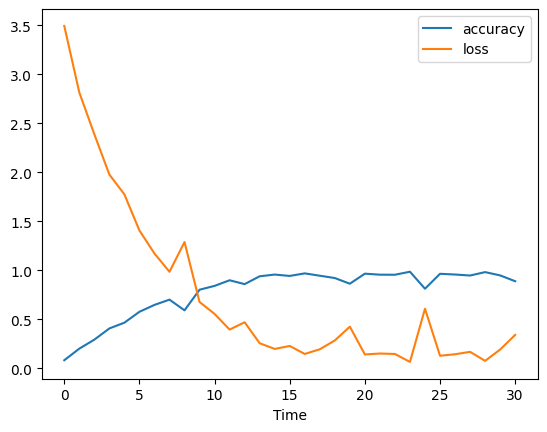

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('Time')
plt.legend(['accuracy', 'loss'])
plt.show()

In [ ]:
model.load_weights('NBM.h5')

In [ ]:
new_model = tf.keras.models.load_model('NBM.h5')

In [ ]:
def predict_image(image_path):
    img = tf.keras.utils.load_img(image_path, target_size=(224,224,3))
    plt.imshow(img)
    plt.show()
    x = tf.keras.utils.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    pred = new_model.predict(images, batch_size=32)
    print("Actual: "+(image_path.split("/")[-1]).split("_")[0])
    print("Predicted: "+classes[np.argmax(pred)])

In [ ]:
model.load_weights('NBM.h5')

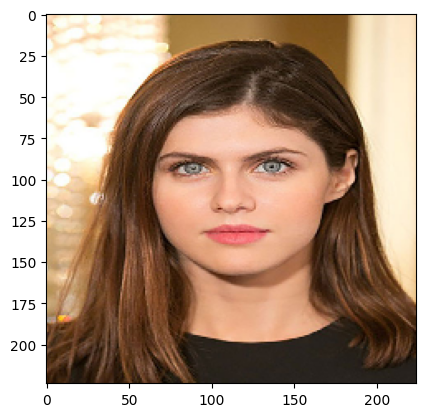

1/1 [==============================] - 0s 145ms/step
Actual: alexandra-daddario-2022-noms-450x600.jpg
Predicted: Alexandra Daddario


In [ ]:
predict_image("alexandra-daddario-2022-noms-450x600.jpg")

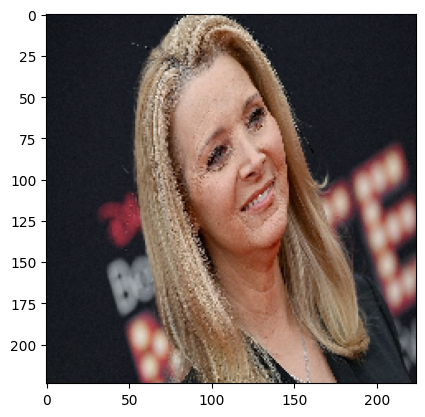

1/1 [==============================] - 0s 27ms/step
Actual: Lisa-Kudrow.jpg
Predicted: Lisa Kudrow


In [ ]:
predict_image("Lisa-Kudrow.jpg")